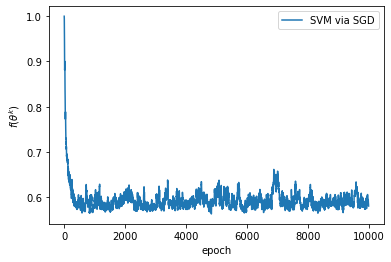

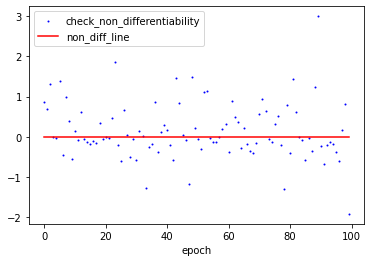

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(invalid='ignore', over='ignore')  
# suppress warning caused by division by inf

N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N,p)
Y = 2 * np.random.randint(2, size = N) - 1

class SVM():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.N = X.shape[0]
        self.p = X.shape[1]
        self.theta = np.zeros(self.p)
        self.learning_rate = 0.01
        self.weight_decay = 0.1

    def loss(self):
        zeros = np.zeros((self.N,1))
        add_zeros = np.hstack(( np.reshape( 
            (1 -self.Y*(self.X@self.theta)), (-1,1) ) , zeros ))
        temp = np.mean( np.max( add_zeros, axis = 1 )) 
        + self.weight_decay * np.sum(self.theta*self.theta)
        return temp

    def train(self):
        idx = np.random.randint(self.N)
        max_mark = 0
        if 1-self.Y[idx]*(self.X[idx,:]@self.theta) >= 0 :
            max_mark = 1
        self.theta -= self.learning_rate * ( 
            max_mark * ( -self.Y[idx] * self.X[idx,:]) 
            + 2 * self.weight_decay * self.theta )

        return 1-self.Y[idx]*(self.X[idx,:]@self.theta)

epochs = 10000

model = SVM(X, Y)
check_non_diff = []
loss_list = []

for epoch in range(epochs):

    if epoch % 100 == 0 :
        check_non_diff.append(model.train())
    else :
        model.train()
    loss_list.append(model.loss())

plt.plot(list(range(epochs)), loss_list, label = "SVM via SGD")
plt.xlabel("epoch")
plt.ylabel(r"$f(\theta^k)$")
plt.legend()
plt.show()

plt.scatter(list(range(len(check_non_diff))), check_non_diff, 
            label = "check_non_differentiability", s = 1, color = 'blue')
plt.plot(list(range(len(check_non_diff))), [0] * len(check_non_diff) , 
         label = "non_diff_line", color = 'red')
plt.xlabel("epoch")
plt.legend()
plt.show()

